# `Детектирование лица` с помощью DeepFace
___

[Detection](https://sefiks.com/2020/08/25/deep-face-detection-with-opencv-in-python/)

___
## <center> DeepFace.`extract_faces`()
___

**Аргументы метода** `extract_faces`():

- `img_path` (str | np.ndarray): путь к файлу | массив изображения

- $\boxed{\checkmark}$ **`target_size` (224, 224): окончательный размер массива детектированного лица .**

- $\boxed{\checkmark}$ **`detector_backend` (opencv): детектор лица :**
    - 'opencv', 
    - 'retinaface',
    - 'mtcnn', 
    - 'ssd', 
    - 'dlib', 
    - 'mediapipe', 
    - 'yolov8' 

- $\boxed{\checkmark}$  **`enforce_detection` (True): Вызывает исключение, если лицо не обнаружено** .

- `align` (True): Выравнивать лицо .

- `expand_percentage` (0): Увеличить площадь обнаруженного лица в процентах .

- $\boxed{\checkmark}$ **`grayscale` ( False): Преобразование изображения в серые цвета перед обработкой .**

**Возвращает:**

[ { str : Any } ] : Список словарей с ключами:

- `"face" `(np.ndarray): Массив распознанного лица.

- `"facial_area"` (List[float]): Список координат левого угла (x, y) и приращений координат (w, h) для правого угла .

- `"confidence"` (float): Значение метрики уверенности распознования лица.

___
### `Изображение` $\rightarrow$ `детекция`

In [66]:
from deepface import DeepFace
import cv2
import numpy as np


def detection_visualization( img_path:str | np.ndarray, db_path:str ='data/wiki/', detector='ssd', visualize=False, original_coords = None) -> tuple:
    """Детектирует лицо на изображении и визуализирует результат

    Args:
        img_path (str | np.ndarray): Путь к изображению | Массив изображения
        detector (str, optional): Детектор лиц на изображении. Defaults to 'opencv'.
        visualize (bool, optional): Визуализация результата. Defaults to True.

    Returns:
        tuple: (Массив детектированного лица, координваты лица, уровень уверенности детекции)
    """

    img_path_full = db_path + img_path
    try:
        detect_results = DeepFace.extract_faces(img_path=img_path_full, detector_backend=detector)
    except ValueError:
        detect_results = DeepFace.extract_faces(img_path=img_path_full, enforce_detection=False, detector_backend=detector)
    face_array = detect_results[0]['face']
    face_coords = detect_results[0]['facial_area']
    confidence = detect_results[0]['confidence']
    x, y, w , h, le, re =  face_coords.values()

    if visualize is True:
    # Визуализация результата детекции лица на изображении

        img = cv2.imread(img_path_full)
        rectangle_list = [[(x, y), (x + w, y + h), (200, 0, 0), 4]]

        if original_coords is not None:
            rectangle_list.append(original_coords + [(0, 200, 0), 4]) 
        
        for rectangle in rectangle_list:
            cv2.rectangle(img, *rectangle)
        
        cv2.imshow('Img', img)
        
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return face_array, face_coords, confidence

`Пример использования`

In [67]:
path_to_img = '17/10000217_1981-05-05_2009.jpg'
detection_results = detection_visualization(img_path= path_to_img, visualize=True , detector='mediapipe')

___
## <center> `Детектирование нескольких лиц`


{'x': 250, 'y': 106, 'w': 82, 'h': 119, 'left_eye': None, 'right_eye': None}
{'x': 142, 'y': 84, 'w': 70, 'h': 123, 'left_eye': None, 'right_eye': None}


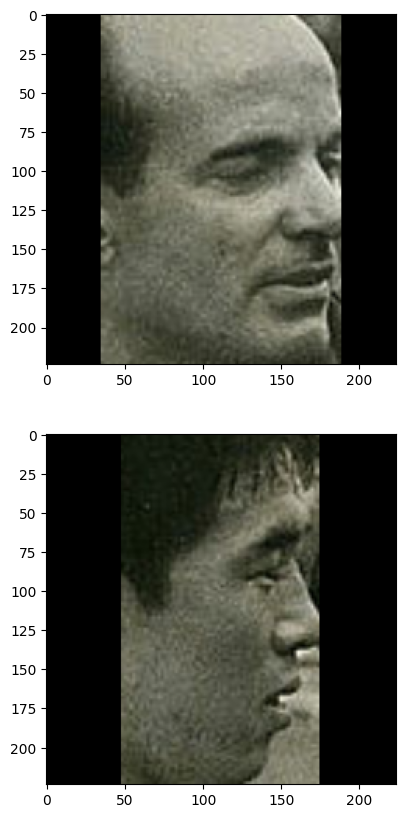

In [53]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt


path_to_db = 'data/wiki/'
path_to_img_db = '48/10000548_1925-04-04_1964.jpg'
path_to_img = path_to_db + path_to_img_db

img = cv2.imread(path_to_img)
faces = DeepFace.extract_faces(path_to_img, enforce_detection=False,detector_backend='ssd' )
faces_count = len(faces)
fig, axs = plt.subplots(ncols=1, nrows=faces_count,figsize=(5,10))

for num, face in enumerate(faces):
    axs[num].imshow(face['face'])
    print(face['facial_area'])

___
## <center> Датасет `WIKI`
___

### [*Описание датасета*](https://memotut.com/en/a2410f46669c5f20ee8e/)


Столбцы:
- dob : Дата рождения (Matlab serial date number)

- photo_taken : Год фотографии 

- full_path : Путь к изображению

- gender : Пол

- name : Имя

- face_location : Координаты лица

- face_score : Наибольшее значение метрики обноружения лица

- second_face_score : Второе значение метрики обноружения лица


___
### <center> Создание датафрейма

___
### `mat` $\rightarrow$ `DataFrame`

In [1]:
import scipy.io
import pandas as pd
import numpy as np


def mat_to_df(mat_path, columns:list) -> pd.DataFrame:
    mat = scipy.io.loadmat(mat_path)
    dataset = pd.DataFrame(mat['wiki'][0])

    feature_dict = {}
    for column in columns:
        feature_dict[column] = dataset[column][0][0]
        
    df = pd.DataFrame(feature_dict)

    for column in df.columns:
        try:
            if type(df[column][0]) == np.ndarray :
                df[column] = df[column].apply(lambda arr: arr[0])
        except IndexError:
            print('Column:',column, 'IndexError !')

    return df

`Пример использования`

In [4]:
mat_path = 'data/wiki/wiki.mat'
columns = ['full_path', 'name', 'face_location', 'face_score', 'second_face_score']

df = mat_to_df(mat_path=mat_path, columns=columns)
df.head(3)

Column: name IndexError !


,full_path,name,face_location,face_score,second_face_score
0,17/10000217_1981-05-05_2009.jpg,[Sami Jauhojärvi],"[111.29109473290997, 111.29109473290997, 252.6...",4.300962,NaN
1,48/10000548_1925-04-04_1964.jpg,[Dettmar Cramer],"[252.48330229530742, 126.68165114765371, 354.5...",2.645639,1.949248
2,12/100012_1948-07-03_2008.jpg,[Marc Okrand],"[113.52, 169.83999999999997, 366.08, 422.4]",4.329329,NaN


___
### <center> Создание столбцов

___
### `df.face_location` $\rightarrow$ `cv2.rectangle()`

Столбец с истинными координатами лица для визуализации 

In [5]:
df['rectangle_coords'] = df['face_location'].apply(lambda array: [(array[0].astype(int), array[1].astype(int)) , (array[2].astype(int), array[3].astype(int))  ] )
df.head(3)

,full_path,name,face_location,face_score,second_face_score,rectangle_coords
0,17/10000217_1981-05-05_2009.jpg,[Sami Jauhojärvi],"[111.29109473290997, 111.29109473290997, 252.6...",4.300962,NaN,"[(111, 111), (252, 252)]"
1,48/10000548_1925-04-04_1964.jpg,[Dettmar Cramer],"[252.48330229530742, 126.68165114765371, 354.5...",2.645639,1.949248,"[(252, 126), (354, 228)]"
2,12/100012_1948-07-03_2008.jpg,[Marc Okrand],"[113.52, 169.83999999999997, 366.08, 422.4]",4.329329,NaN,"[(113, 169), (366, 422)]"


___
###  $\rightarrow$ `[ true rectangle coords ], [ detected rectangle coords ]`

In [6]:
def get_coordinates(
        df:pd.DataFrame=df,
          coords_column:str='face_location', 
          img_path_column:str='full_path', 
          db_path:str ='data/wiki/', 
          img_indx:int=0 , 
          visualize=False, 
          detector='ssd',
          original_coords:str='rectangle_coords') -> tuple:
    
    """Функция для извлечения из датафрейма истинных координат и получения координат детектированного лица

    Args:
        df (pd.DataFrame, optional): Датасет. Defaults to df.
        coords_column (str, optional): Столбец с истинными координатами. Defaults to 'face_location'.
        img_path_column (str, optional): Путь к изображению. Defaults to 'full_path'.
        db_path (str, optional): Путь к папкам с изображениями. Defaults to 'data/wiki/'.
        img_indx (int, optional): Индекс картинки в датасете. Defaults to 0.

    Returns:
        tuple: ( [ Истинные координаты лица ], [ Координаты детектированного лица ])
    """

    true_coords = df[coords_column][img_indx].reshape(-1).tolist()
    
    img_path =  df[img_path_column][img_indx]
    if detection_visualization(img_path=img_path, detector=detector)[2] > 0:
        x0, y0, w, h, _, _ = detection_visualization(img_path=img_path, original_coords=df[original_coords][img_indx], visualize=visualize, detector=detector)[1].values()
        x1 = x0 + w
        y1 = y0 + h
        detected_coords = [x0, y0, x1, y1]
    else:
        detection_visualization(img_path=img_path, original_coords=df[original_coords][img_indx], visualize=visualize, detector=detector)
        detected_coords = [0, 0, 0, 0]
    
    return true_coords, detected_coords


`Пример использования`

In [7]:
get_coordinates(img_indx=1, visualize=True, detector='ssd')

([252.48330229530742,
  126.68165114765371,
  354.5319259615696,
  228.73027481391588],
 [250, 106, 332, 225])

___
### `Coordinates` $\rightarrow$ `IoU`

Вычисление метрики Intersection over Union

In [8]:
import torch
import torchvision.ops.boxes as bops


def get_iou(true_coords:list, detect_coords:list) -> float:
    """Вычисление IoU (Степень пересечения ограничивающих квадратных рамок)

    Args:
        true_coords (list): Истинные координаты левого нижнего и правого верхнего угла лица
        detect_coords (list):   Координаты левого нижнего и правого верхнего угла после детекции лица

    Returns:
        float: Значение метрики
    """
    true_rectangle = torch.tensor([true_coords], dtype=torch.float)
    detect_rectangle = torch.tensor([detect_coords], dtype=torch.float)

    return bops.box_iou(true_rectangle, detect_rectangle).numpy()[0,0]

`Пример использования`

In [9]:
true_coords, detect_coords = get_coordinates(img_indx=16, visualize=True, detector='yolov8')
get_iou(true_coords, detect_coords)

0.6210623

___
### `df.IoU`
Создание столбца с метрикой IoU для определенной модели детектора лиц

In [10]:
import time

def create_iou_column(df:pd.DataFrame=df, detector:str='opencv') -> pd.DataFrame:

    start_time = time.time()
    column_name = 'IoU_' + detector
    df[column_name] = 0
    log_exception = []
    for indx in range(df.shape[0]):
        try:
            iou = get_iou(true_coords= get_coordinates(img_indx=indx, detector=detector)[0], detect_coords=get_coordinates(img_indx=indx, detector=detector)[1])
            df[column_name][indx] = iou
        except Exception:
            df[column_name][indx] = np.nan
            log_exception.append(indx)

    end_time = time.time()

    print('NaN значения по индексам: ',log_exception)
    print(f'Время выполнения {detector}: {end_time - start_time} ')
    df.to_csv(f'df_iou_{detector}.csv')
    return df

`Применение функции :`

In [ ]:
detector_list = ['opencv', 'ssd', 'mtcnn', 'retinaface', 'mediapipe', 'yolov8']

for detector in detector_list:
    create_iou_column(detector=detector)
    print(f'Column IoU_{detector} is done !')

___
### `df.Conf`
Создание столбца с метрикой уверенности для определенной модели детектора лиц

In [13]:
import time

def create_confidence_column(df:pd.DataFrame=df, detector:str='opencv') -> pd.DataFrame:

    start_time = time.time()
    column_name = 'Conf_' + detector
    df[column_name] = 0
    log_exception = []
    for indx in range(df.shape[0]):
        try:
            conf = detection_visualization(img_path=df['full_path'][indx], detector=detector)[2]
            df[column_name][indx] = conf
        except Exception:
            df[column_name][indx] = np.nan
            log_exception.append(indx)

    end_time = time.time()
    print('NaN значения по индексам: ',log_exception, 'Кол-во : ', len(log_exception))
    print(f'Время выполнения {detector}: {end_time - start_time} ')
    df.to_csv(f'df_conf_{detector}.csv')
    return df

`Применение функции :`

In [12]:
detector_list = ['dlib','opencv', 'ssd', 'mediapipe', 'yolov8']

for detector in detector_list:
    create_confidence_column(detector=detector)
    print(f'Column Conf_{detector} is done !')

NaN значения по индексам:  [283, 423, 552, 585, 588, 967, 969, 1049, 1171, 1292, 1371, 1546, 1683, 1990, 2232, 2347, 2691, 3226, 3469, 3656, 4020, 4592, 4670, 5076, 5122, 5138, 5150, 5679, 5710, 5711, 5714, 5740, 6286, 6363, 6812, 6818, 7056, 7232, 7449, 7497, 7614, 7895, 8016, 8745, 8837, 8868, 8963, 9086, 9494, 9696, 9962, 10180, 10627, 10636, 10714, 10729, 10971, 11051, 11492, 11517, 11691, 11747, 11748, 11927, 11966, 12190, 12832, 12937, 13076, 13151, 13256, 13322, 14627, 15145, 15293, 15343, 15802, 15850, 16058, 16068, 16078, 16167, 16214, 16631, 17494, 17612, 17852, 18153, 18186, 18317, 18510, 18794, 18926, 19095, 19151, 19266, 19433, 19464, 19467, 19531, 19839, 20454, 20664, 21178, 21441, 21873, 22376, 22384, 22778, 23080, 23132, 23179, 23235, 23303, 23471, 23951, 24001, 24086, 24325, 24403, 24519, 24527, 24752, 24962, 25139, 25384, 25390, 25416, 25777, 25828, 25924, 26297, 26436, 26558, 26852, 26899, 27179, 27359, 27424, 27549, 27619, 27895, 28117, 28128, 28164, 28270, 28484, 2

In [22]:
detector_list = ['opencv', 'ssd', 'mediapipe', 'yolov8']

for detector in detector_list:
    df = create_confidence_column(detector=detector, df=df[:1500])
    print(f'Column Conf_{detector} is done !')

NaN значения по индексам:  [283, 588, 869] Кол-во :  3
Время выполнения opencv: 269.14474296569824 
Column Conf_opencv is done !
NaN значения по индексам:  [283, 588, 720] Кол-во :  3
Время выполнения ssd: 175.45605564117432 
Column Conf_ssd is done !
NaN значения по индексам:  [46, 63, 64, 66, 67, 72, 73, 78, 86, 117, 119, 120, 122, 132, 151, 152, 154, 174, 184, 283, 390, 400, 435, 510, 516, 520, 566, 588, 833, 847, 1011, 1013, 1146, 1198, 1224, 1257, 1268, 1276, 1343, 1345, 1346, 1347, 1413, 1419, 1424, 1425, 1432, 1447, 1450, 1452, 1456, 1460, 1461, 1462, 1463, 1471, 1474, 1476, 1479] Кол-во :  59
Время выполнения mediapipe: 17.379692554473877 
Column Conf_mediapipe is done !
NaN значения по индексам:  [283, 423, 585, 588, 1479] Кол-во :  5
Время выполнения yolov8: 278.0820565223694 
Column Conf_yolov8 is done !


___
## <center> `Сравнение моделей`
___

`Средняя уверенность` детектирования лица

In [25]:
df_conf = pd.read_csv('df_conf_yolov8.csv')
df_conf[['Conf_mediapipe', 'Conf_yolov8',  'Conf_ssd', 'Conf_opencv']].mean()

Conf_mediapipe    0.440271
Conf_yolov8       0.682662
Conf_ssd          0.694315
Conf_opencv       0.490608
dtype: float64

In [28]:
df_conf = pd.read_csv('df_conf_dlib.csv')
df_conf['Conf_dlib'][:1500].mean()


0.5581195433176629

`Время работы` для 1500 объектов (confidence):

|  Модель | Время работы, сек |
|---|---|
| mediapipe | 15 |
|dlib | 140|
|ssd | 142|
| yolov8| 216|
|opencv |225 |
|mtcnn |> 1000 |
|retinaface | > 1000|

`Кол-во пропущенных объектов` для 1500 объектов (confidence):

|  Модель | Пропущено объектов |
|---|:---:|
| mediapipe | 59 |
|dlib | 11|
|ssd |3 |
| yolov8|5 |
|opencv | 3|
|mtcnn |- |
|retinaface | - |

`Уверенность в детектировании`

|  Модель | Confidence |
|---|:---:|
| mediapipe | 0.44 |
|dlib | 0.55|
|`ssd` |0.69 |
| `yolov8`|0.68 |
|opencv | 0.49|
|mtcnn |- |
|retinaface | - |


In [1]:
import pandas as pd

df_iou = pd.read_csv('df_iou_opencv.csv')

`Средняя метрика IoU`

In [12]:
df_iou[['IoU_mediapipe', 'IoU_yolov8',  'IoU_ssd', 'IoU_opencv', 'IoU_dlib']].mean()

IoU_mediapipe    0.394040
IoU_yolov8       0.534643
IoU_ssd          0.482606
IoU_opencv       0.372627
IoU_dlib         0.472540
dtype: float64

`Кол-во не детектировааных объектов`

In [13]:
df_iou[['IoU_mediapipe', 'IoU_yolov8',  'IoU_ssd', 'IoU_opencv', 'IoU_dlib']].isna().sum()

IoU_mediapipe    229
IoU_yolov8       175
IoU_ssd          173
IoU_opencv       173
IoU_dlib         181
dtype: int64

___
## <center> `Выводы`
___
- `Датасет` не подходит в полной мере для оценки моделей детекторов, т.к. :
    - Имеются изображения с неразмеченными лицами
    - Разметка квадратная, при неквкадратной разметке детектором ,IoU не может быть равен 1
    - Имеются  изображения, которые не читаются
    - Лица знаменитостей не подходят по смыслу исходной задачи
    - Качество изображений слишком хорошее
    - Ракурс изображения не подходит по смыслу исходной задачи
    
- С точки зрения точности, быстродействия 
    - `наиболее подходящие` модели :
        - `SSD`
        - `Yolov8`
     - `наименее подходящие` модели :
        - `retinaface`
        - `mtcnn`

-  `Датасеты` для детекции лиц:

|Название |Ссылка |
|---|---|
|Face-Detection-Dataset |https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset|
|CelebA |http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html |
| Лучшие датасеты для детекции лиц| https://imerit.net/blog/5-million-faces-top-14-free-image-datasets-for-facial-recognition-all-pbm/|


___
## <center> Датасет `Face Images with Marked Landmark Points`

[**Kaggle**](https://www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points?select=face_images.npz)

- Крупный масштаб лиц
___

Импорт `.npz` 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


arrays = np.load('data/Face Images with Marked Landmark Points/face_images.npz')
names = list(arrays)[0]

fig, axs = plt.subplots(ncols=5, nrows=1,figsize=(25,25))

for ind in range(5): 
    arr = arrays[names][:, :, ind]
    axs[ind].imshow(arr)



___
## <center> Датасет `Face Detection in Images`

[**Kaggle**](https://www.kaggle.com/datasets/dataturks/face-detection-in-images)

- Нет доступа к скачиванию изображений
___

In [38]:
import pandas as pd
import json
import wget


df = pd.read_json('data/Face Detection in Images/Face Detection in Images.json')
link = df['content'][1]
# wget.download(link)
link

'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/d1c32c8e-8050-482d-a6c8-b101ccba5b65___0de0ee708a4a47039e441d488615ebb7.png'

___
## <center> Датасет `UTKFace`

[**Site**](https://susanqq.github.io/UTKFace/)

- Крупный масштаб лиц
- Нет размеченных данных
___

___
## <center> Датасет `YouTube Faces With Facial Keypoints`

[**Kaggle**](https://www.kaggle.com/datasets/selfishgene/youtube-faces-with-facial-keypoints)

- Нет размеченных данных
___

Aaron_Eckhart_0.npz
Aaron_Eckhart_1.npz
Abba_Eban_0.npz
Abba_Eban_5.npz
Abdel_Aziz_Al-Hakim_0.npz
Abdel_Aziz_Al-Hakim_1.npz
Abdel_Aziz_Al-Hakim_4.npz
Abdoulaye_Wade_0.npz
Abdoulaye_Wade_1.npz
Abdulaziz_Kamilov_0.npz


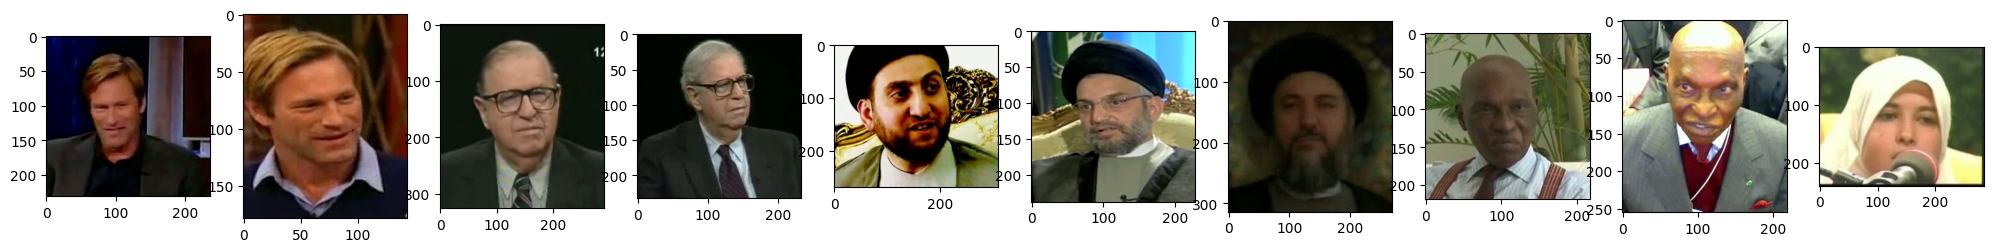

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

path_db = 'data/YouTube Faces With Facial Keypoints/youtube_faces_with_keypoints_full_1/'
name_array = 'Aaron_Eckhart_1.npz'
img_path = path_db + name_array


def npz_load(img_path: str) -> np.ndarray:
    arrays = np.load(img_path)
    name = list(arrays)[0]
    array = arrays[name][:, :, :, 20]
    return array


img_list = list(os.walk(path_db))[0][2]
fig, axs = plt.subplots(ncols=10, nrows=1,figsize=(25,25))

for num, name_array in enumerate(img_list[:10]):
    img_path = path_db + name_array
    arr = npz_load(img_path=img_path)
    axs[num].imshow(arr)
    print(name_array)


In [35]:
df = pd.read_csv('data/YouTube Faces With Facial Keypoints/' + 'youtube_faces_with_keypoints_full.csv')
df
df_g = df.groupby('personName')['personName'].count().sort_values(ascending=False)
df_g[df_g.values > 4].count()

27

___
## <center> Датасет `LWF`

[**Kaggle**](https://vis-www.cs.umass.edu/lfw/#download)